In [4]:
import pandas as pd # already comes with matplotlib and NumPy
import glob
import os
import plotnine

# import matplotlib


In [8]:
# getting working directory
cwd = os.getcwd() 
print(cwd) # was originally set to src, had to change it to project dir

# set working directory
# os.chdir('../') # check and see before running this again

/home/meelyn/Documents/cloud_development/sw-python-ecology-lesson/src


In [11]:
# read csv
pd.read_csv('data/surveys.csv')

surveys_df = pd.read_csv('data/surveys.csv')
surveys_df # will print output if you type df name or print(surveys_df)


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [31]:
# Attributes and Methods

# print(surveys_df) # prints out a bit of the data frame
# HINT! if you want everything to print out on Jupyter Notebook cell, you will need to use print()

print(surveys_df.head()) # only prints first few rows

print(type(surveys_df)) # type is pandas.core.frame.DataFrame

print(surveys_df.dtypes) # prints out variable types

# Useful ways to view DataFrame Objects in Python
## there are many ways to summarize and access the data stored in DataFrames, using attributes and methods provided by the DataFrame object.

## attributes - features of an object (columns, rows, variable type)
### shape will output the size (number of rows and columns) of an object
### access an attribute name by 'df_object.attribute' ex. surveys_df.columns, returns an array/list
print(surveys_df.columns)

### methods are like functions, but only work on particular kinds of objects
### head() is a function that returns the first few rows of dataframe
print(surveys_df.head())

# Challenge DataFrames
print(surveys_df.columns)
print(surveys_df.shape) # returns variable names, number of rows and number of columns
# shape is a tuple - consists of a number of values separated by commas

# print(surveys_df.head(15)) # prints first 15 rows, remember that python starts at 0

# print(surveys_df.tail())

print(pd.unique(surveys_df['species_id'])) # gets unique number of species

site_names = pd.unique(surveys_df['plot_id'])
print('site names', site_names)

# difference between len(site_names) and surveys_df['plot_id'].nunique() - no difference, both print out the same value (24)
print('site name length', len(site_names))
print('unique plot id from surveys_df', surveys_df['plot_id'].nunique())


print(surveys_df['weight'].describe()) # provides basic summary statistics

#can extract specific metrics from describe method
print('weight min', surveys_df['weight'].min())
print('weight max', surveys_df['weight'].max())
print('weight mean', surveys_df['weight'].mean())
print('weight std', surveys_df['weight'].std())
print('weight count', surveys_df['weight'].count())




   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
<class 'pandas.core.frame.DataFrame'>
record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object
Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')
   record_id  month  day  year  plot_id species

In [37]:
# summarize by one or more variables, use panadas .groupby method
grouped_data = surveys_df.groupby('sex')
print(grouped_data.describe()) # need to use describe method to display summary stats from the groupby dataframe by sex
print(grouped_data.mean(numeric_only=True)) # only provides the mean of the numeric variables.

    record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.18

In [50]:
# Challenge - Summary Data
# 1. How many recorded individuals are female F and how many are male M - 15690 females, 17348 males

print(surveys_df.groupby('sex').count())

# 2. What happens when you group by two columns using the following syntax and then calculate mean values?

grouped_data2 = surveys_df.groupby(['plot_id', 'sex']).describe()
print('described grouped data 2', grouped_data2)

print('numeric only grouped data 2', grouped_data2.mean(numeric_only = True)) # need the numeric_only = True when calculating the mean because...

# better to use .agg after .groupby() to obtain the last survey year, median foot-length and mean weight for each plot/sex combo
print('aggregate grouped data 2', surveys_df.groupby(['plot_id', 'sex']).agg({"year": 'max',
                                            "hindfoot_length": 'max',
                                            "weight": 'mean'}))

# 3. summarize weight values for each site in your data. Use by_site['weight'].describe()
weight_sum = surveys_df.groupby(['plot_id'])['weight'].describe() # grouping by plot id, describe the weight stats
print('weight sum', weight_sum)

     record_id  month    day   year  plot_id  species_id  hindfoot_length  \
sex                                                                         
F        15690  15690  15690  15690    15690       15690            14894   
M        17348  17348  17348  17348    17348       17348            16476   

     weight  
sex          
F     15303  
M     16879  
described grouped data 2             record_id                                                         \
                count          mean           std     min       25%      50%   
plot_id sex                                                                    
1       F       848.0  18390.384434  10469.790852     9.0   8783.50  19182.5   
        M      1095.0  17197.740639   9911.570595     6.0   8638.00  17043.0   
2       F       970.0  17714.753608  10300.015076     3.0   9580.25  18104.5   
        M      1144.0  18085.458042  10555.331260     1.0   8653.00  19024.5   
3       F       893.0  19888.783875   9352.010884 

In [52]:
# creating summary counts in pandas
species_count = surveys_df.groupby(['species_id'])['record_id'].count() # counts the number of unique species for each record id
print(species_count) # prints data frame of species and id
print('species id count', species_count.describe()) # again, describe provides summary statistics

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64
species id count count       48.000000
mean       724.708333
std       1728.925837
min          1.000000
25%          5.000000
50%         37.500000
75%        552.500000
max      10596.000000
Name: record_id, dtype: float64


In [24]:
# count the number of rows for a specific TagId
bad_tag = surveys_df.groupby('UsbPort')['TagId'].count()['0c5f5ced']

KeyError: '0c5f5ced'

<Axes: xlabel='UsbPort,RadioId'>

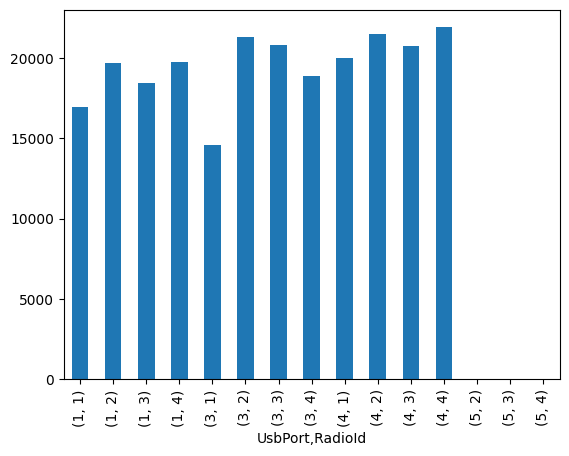

In [7]:
# Quick and Easy Plotting Data Using Pandas
## Make sure figures appear inline in Ipython Notebook
%matplotlib inline

# Create a quick bar chart
blu_count.plot(kind='bar')

In [38]:
total_count = surveys_df.groupby('UsbPort')['TagId'].nunique()
print(type(total_count))
total_count.plot(kind='scatter')

<class 'pandas.core.series.Series'>


ValueError: plot kind scatter can only be used for data frames

In [21]:
# Time Series Graph
blu_time = pd.DataFrame()
print(blu_time)

blu_time.plot(x='Time', color=['UsbPort', 'RadioId'])

Empty DataFrame
Columns: []
Index: []


KeyError: 'Time'